## Introduction

Diffracted electrons scattered from a crystalline structure will form concentric circles on an observation plane in accordance to the spacing between the crystal lattice. This is the same as Bragg's Angle from wave theory of light.


## Method

The 'ideal' crystalline orientation will occur sometimes and reflect the electrons perfectly. Therefore the electrons would spread out in a cone, producing interference maxima. The first two interference orders are determined by the spacing in 2 dimensions. For greater orders, the spacing between the lattice must be bigger, following Bragg's angle,

\begin{equation}
    2d \sin{\theta} = n \lambda \text{ for } n= 1,2,3...
\end{equation}

In this experiment we will be accelerating electrons through a potential difference whereby the kinetic energy is given as 

\begin{equation}
    KE = \frac{p^2}{2m} = eU_a.
\end{equation}

This allows us to write the momentum of the electron in terms of an accelerating voltage,

\begin{equation}
    p = \sqrt{2meU_a}.
\end{equation}

Therefore the wavelength of the electron can be expressed as,

\begin{equation}
    \lambda = \frac{h}{\sqrt{2meU_a}}.
\end{equation}

Using trigonometry and Bragg's Angle, we can express the radius of the sphere in which the electron cone is subtended as 

\begin{equation}
    r = n\frac{2Rh}{d\sqrt{2meU_a}}
\end{equation}

In [8]:
import numpy as np
import scipy.optimize as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Defining fitting function

def radius(V,k):
    return k*1/np.sqrt(V)

## Analysis

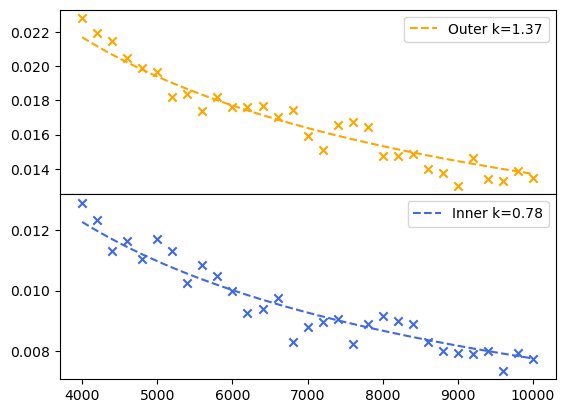

In [31]:
r_df = pd.read_csv('../Data/radius.csv')

v = r_df['Voltage (kV)']*1000
r_1 = r_df['n=1 ring (mm)']*10**-3 /2
r_2 = r_df['n=2 ring (mm)']*10**-3 /2

v_smooth = np.linspace(v.min(),v.max(),5000)

param1,covariance1 = sp.curve_fit(radius,v,r_1)
r_1smooth = radius(v_smooth,*param1)

param2,covariance2 = sp.curve_fit(radius,v,r_2)
r_2smooth = radius(v_smooth,*param2)

f,axes = plt.subplots(2,1,sharex=True)
f.subplots_adjust(hspace=0)
ring1 = axes[1].scatter(v,r_1,c='royalblue',marker='x')
ring2 = axes[0].scatter(v,r_2,c='orange',marker='x')
line1 = axes[1].plot(v_smooth,r_1smooth,c='royalblue',linestyle='--',label=f'Inner k={param1[0]:.2f}')
line2 = axes[0].plot(v_smooth,r_2smooth,c='orange',linestyle='--',label=f'Outer k={param2[0]:.2f}')
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')


In [32]:
# Error

perr1 = np.sqrt(np.diag(covariance1))
perr2 = np.sqrt(np.diag(covariance2))

print(perr1,perr2)

[0.00622887] [0.00996611]


## Calculating $d_{\text{inner}}$ and $d_{\text{outer}}$

We set 

\begin{equation}
    k = \frac{2Rhn}{\sqrt{2me}}\frac{1}{d}
\end{equation}

and so we can obtain

\begin{equation}
    d = \frac{2Rhn}{k\sqrt{2me}}.
\end{equation}

In [34]:
# Value for inner d 
R = 65e-3
h = 6.625e-34
M = 9.109e-31
e = 1.62e-19

d_inner = 2*R*h/(param1[0]*np.sqrt(2*M*e))
d_outer = 2*2*R*h/(param2[0]*np.sqrt(2*M*e))

print(d_inner, d_outer)

2.0429265294208609e-10 2.312480300246969e-10
